In [1]:
import pandas as pd
from src.data.metrics import  get_metrics
import matplotlib.pyplot as plt

In [2]:
hparams = [
    "model_cls",
    "lr",
    "n_hidden",
    "n_layers",
    "embedding_type",
    "loc_levels",
    "time_levels",
    "time_embedding_factor",
    "dropout",
]
metrics = [
    "macro_f1",
    "top_5_accuracy",
    "top_1_accuracy",
]

In [3]:
df = pd.read_json("../reports/time_grid_new.jsonl", lines=True)
get_metrics(df, metrics)

In [18]:
get_metrics(df, ['macro_f1'])

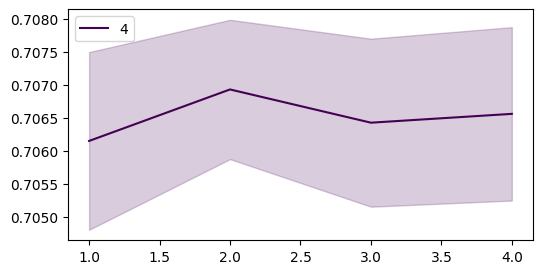

In [20]:
metric = "macro_f1"
model = "BiTULER"
dfm = df[(df["model_cls"] == model) & (df["loc_levels"] == 4)]
dfm = (
    dfm.groupby(["loc_levels", "time_levels", "model_cls"])[metric]
    .agg(["mean", "std"])
    .reset_index()
)
cmap = plt.get_cmap("viridis", 2)
colors = cmap(range(2))
fig, ax = plt.subplots(figsize=(6, 3))

for idx, (loc_level, df_line) in enumerate(dfm.groupby("loc_levels")):
    x = df_line["time_levels"]
    y = df_line["mean"]
    err = df_line["std"]
    color = colors[idx]
    ax.plot(x, y, label=loc_level, color=color)
    ax.fill_between(x, y - err, y + err, alpha=0.2, color=color)
ax.legend()